<a href="https://colab.research.google.com/github/GokulAnnam/Spam-Classification/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Step 1: Clone YOLOv5 repository and install dependencies
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.09 MiB | 19.60 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 17.5 MB/s eta 0:00:00


In [ ]:
# Step 2: Import necessary libraries
import torch
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Step 3: Load YOLOv5 pre-trained model (yolov5s)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-1-28 Python-3.11.11 torch-2.5.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 111MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# Step 4: Load your image from the Colab directory
image_path = '/content/yolotest2.jpg'  # Replace 'your_image.jpg' with the name of your uploaded image
original_image = Image.open(image_path)

In [ ]:
# Step 5: Resize the image to YOLOv5 input size (if necessary)
# Resize image if it's too large (YOLOv5 handles resizing automatically, but this ensures better performance)
max_dimension = 640  # YOLOv5 works best with images around 640x640
resized_image = original_image.copy()
if max(original_image.size) > max_dimension:
    resized_image.thumbnail((max_dimension, max_dimension))

In [ ]:
# Step 6: Perform object detection
results = model(resized_image)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
# Step 7: Print results
# Bounding boxes, labels, and confidence scores
print("Detection Results:")
print(results.pandas().xyxy[0])  # DataFrame with detection details

Detection Results:
         xmin       ymin        xmax        ymax  confidence  class    name
0   95.472397  86.306808  240.685928  356.498474    0.939520      0  person
1  362.423462  94.443497  492.881958  355.816589    0.933550      0  person
2  227.416504  77.571564  384.560913  355.501984    0.930097      0  person


xmin: The x-coordinate of the top-left corner of the bounding box.
ymin: The y-coordinate of the top-left corner of the bounding box.
xmax: The x-coordinate of the bottom-right corner of the bounding box.
ymax: The y-coordinate of the bottom-right corner of the bounding box.
confidence: The confidence score of the prediction (how sure the model is that the detected object belongs to the identified class). It ranges from 0 to 1, where values closer to 1 indicate higher confidence.
class: The class index of the detected object. Each class is assigned a numerical index, starting from 0. For example, class = 0 typically represents "person" in many pre-trained models.
name: The name of the detected class (in this case, "person").

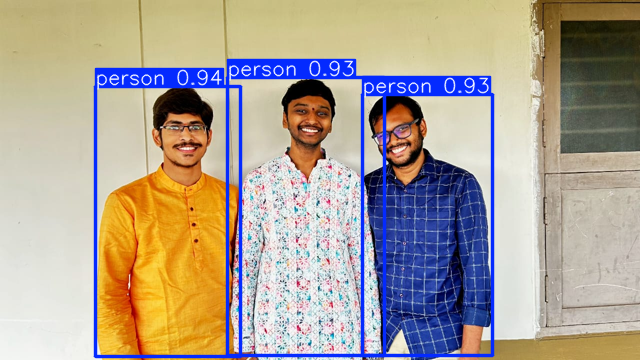

In [ ]:
# Step 9: Show the results image (annotated image with bounding boxes)
results.show()  # This will display the image with bounding boxes in Colab